## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_as_received = pd.merge(mouse_metadata,study_results, on='Mouse ID')

In [2]:
# Checking the number of mice in the DataFrame.
num_mice =len(study_as_received['Mouse ID'].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = study_as_received.duplicated(subset=['Mouse ID','Timepoint'], keep=False)

In [4]:
# Get all the data for any duplicate mouse ID. 
duplicate_mice_data = study_as_received.loc[duplicate_mice,:]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
clean_study = study_as_received.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='last')

In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_study['Mouse ID'].unique())
num_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and 
# putting them all together at the end.
drug_regimen = clean_study.groupby(['Drug Regimen'])

mean_volume = drug_regimen['Tumor Volume (mm3)'].mean()
mean_volume = mean_volume.rename('Mean Tumor Volume (mm3)')

median_volume = drug_regimen['Tumor Volume (mm3)'].median()
median_volume = median_volume.rename('Median Tumor Volume (mm3)')
                 
var_volume = drug_regimen['Tumor Volume (mm3)'].var()
var_volume = var_volume.rename('Tumor Volume Variance (mm3)')
                 
std_volume = drug_regimen['Tumor Volume (mm3)'].std()
std_volume = std_volume.rename('Tumor Volume Standard Deviation (mm3)')
                 
sem_volume = drug_regimen['Tumor Volume (mm3)'].sem()
sem_volume = sem_volume.rename('Tumor Volume Standard Errors (mm3)')
                 
# combine all statistical parameters into one data frame
summary_stats_concat = pd.concat([mean_volume,median_volume,
                             var_volume,std_volume,sem_volume],axis=1)
summary_stats_concat

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume Standard Errors (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary_stats = clean_study[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

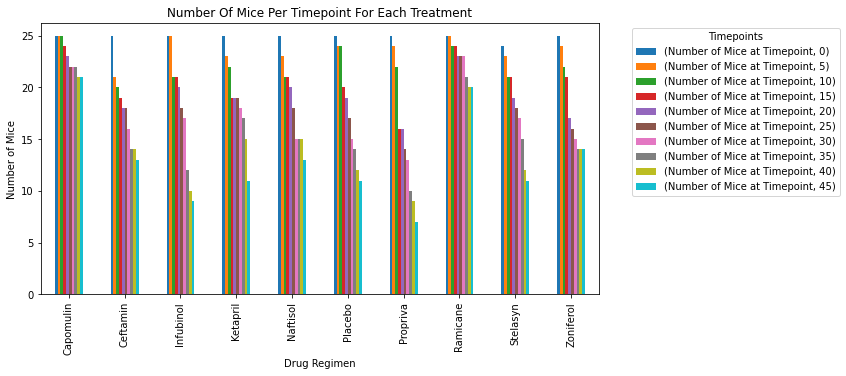

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas.

# create a new table with counts of Mouse ID grouped by Drug Regimen and Timepoint
mice_per_timepoint = clean_study[['Drug Regimen','Timepoint','Mouse ID']].groupby(
                                            ['Drug Regimen','Timepoint']).count()
# remane Mouse ID to Number of Mice per Timepoint
mice_per_timepoint = mice_per_timepoint.rename(columns={"Mouse ID":'Number of Mice at Timepoint'})

# unstack the table to improve visualization of the bar plot
mice_per_timepoint_unstack = mice_per_timepoint.unstack(level=1)

# create and label the plot
df_bar_chart = mice_per_timepoint_unstack.plot(kind='bar', figsize=(10,5),
                                        title='Number Of Mice Per Timepoint For Each Treatment')
df_bar_chart.set_ylabel('Number of Mice')
df_bar_chart.legend(bbox_to_anchor=(1.05,1),title='Timepoints')
df_bar_chart     

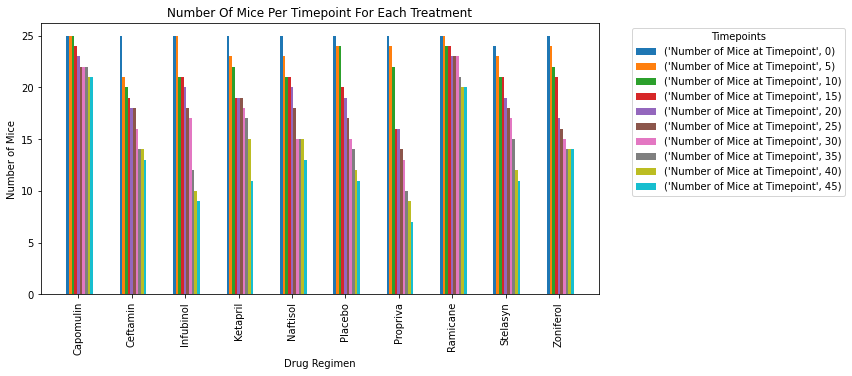

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment
# throughout the course of the study using pyplot.
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',
          'tab:pink','tab:gray','tab:olive','tab:cyan']

# create a list of labels for the x-axis
drug_regimen = mice_per_timepoint_unstack.index

# define the x-axis for entire chart and bar width
x_axis = [x for x in range(len(mice_per_timepoint_unstack))]

bar_width = 0.05
w = 0.05

# define the x-axis for each drug regimen to avoid overlap once plotted
for i in range(0,len(drug_regimen)):
    x_axis[i] = [x+w for x in range(len(x_axis))]
    w += 0.05
    
# define the figure size
plt.figure(figsize=(10,5))

# plot bar charts for each drug regimen
for i in range (10):
    plt.bar(x_axis[i],mice_per_timepoint_unstack.iloc[:,i],color=colors[i],
            width=bar_width)
    
# define the location of the tick marks at the center of bar groups per drug regimen   
tick_location =[x+((len(drug_regimen)/2)*0.05) for x in range(len(x_axis))]

# define formatting elements for the chart and print the final figure
plt.xticks(tick_location,drug_regimen,rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number Of Mice Per Timepoint For Each Treatment')
plt.legend(mice_per_timepoint_unstack.columns,bbox_to_anchor=(1.05,1),title='Timepoints')
plt.show()

## Pie Plots

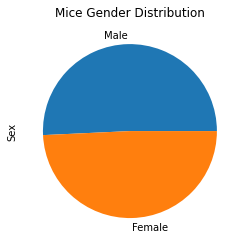

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_study['Sex'].value_counts()
pandas_gender_pie = gender_group.plot(kind='pie',startangle=0,title='Mice Gender Distribution')

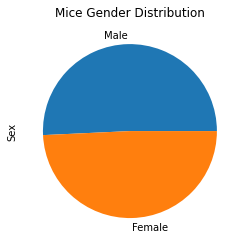

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_group.keys()
colors =['tab:blue','tab:orange']
sizes = gender_group
plt.pie(sizes,labels=labels,colors=colors,startangle=0)
plt.ylabel('Sex')
plt.title('Mice Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# sort the data by timepoint and mouse ID in descending order
sorted_df = clean_study.sort_values(['Timepoint','Mouse ID'], ascending=False)

# obtain a list of all the unique mouse IDs 
mouse_list = sorted_df['Mouse ID'].unique()

# slice the sorted DataFrame by length of mouse_list to obtain the final tumor volume for each mouse 
final_tumor_volume = sorted_df.iloc[:len(mouse_list),:]

# remove all unnecessary columns
final_tumor_volume = final_tumor_volume.loc[:,['Drug Regimen','Tumor Volume (mm3)']]

# filter the data to show only the drug regimens: Capomulin, Ramicana, Infubinol, and Ceftamin
# and store in a new table
promising_drugs = final_tumor_volume.loc[(final_tumor_volume['Drug Regimen']=='Capomulin')|
                                            (final_tumor_volume['Drug Regimen']=='Ramicane')|
                                            (final_tumor_volume['Drug Regimen']=='Infubinol')|
                                            (final_tumor_volume['Drug Regimen']=='Ceftamin'),:]

# create separate lists for each drug regimen
capomulin = promising_drugs.loc[promising_drugs['Drug Regimen']=='Capomulin','Tumor Volume (mm3)']
ramicane = promising_drugs.loc[promising_drugs['Drug Regimen']=='Ramicane','Tumor Volume (mm3)']
infubinol = promising_drugs.loc[promising_drugs['Drug Regimen']=='Infubinol','Tumor Volume (mm3)']
ceftamin = promising_drugs.loc[promising_drugs['Drug Regimen']=='Ceftamin','Tumor Volume (mm3)']

# group the new table by Drug Regimen and describe statistical parameters
promising_drugs_grouped = promising_drugs.groupby(['Drug Regimen']).describe()

# calculate inter-quartile range, upper and lower bounds of confidence intervals
promising_drugs_grouped['IQR']= promising_drugs_grouped.iloc[:,6]-promising_drugs_grouped.iloc[:,4]
promising_drugs_grouped['Lower Bound']=promising_drugs_grouped.iloc[:,4]-(promising_drugs_grouped['IQR']*1.5)
promising_drugs_grouped['Upper Bound']=promising_drugs_grouped.iloc[:,6]+(promising_drugs_grouped['IQR']*1.5)
print(promising_drugs_grouped)

pivot_df = final_tumor_volume.pivot(columns='Drug Regimen',values='Tumor Volume (mm3)')

# calculate outliers
try:
    outliers = 0
    for x in range(0,len(pivot_df)):
        if (pivot_df['Capomulin']<promising_drugs_grouped.iloc[0,4]|pivot_df['Capomulin']>promising_drugs_grouped.iloc[0,6]):
            outliers +=1
        elif (pivot_df['Ramicane']<promising_drugs_grouped.iloc[1,4]|pivot_df['Ramicane']>promising_drugs_grouped.iloc[1,6]):
            outliers +=1
        elif (pivot_df['Infubinol']<promising_drugs_grouped.iloc[2,4]|pivot_df['Infubinol']>promising_drugs_grouped.iloc[2,6]):
            outliers +=1
        elif (pivot_df['Ceftamin']<promising_drugs_grouped.iloc[3,4]|pivot_df['Ceftamin']>promising_drugs_grouped.iloc[3,6]):
            outliers +=1
except TypeError:
    pass
print(f'There are {outliers} outliers in the dataset')

             Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                  40.0  36.511026  5.677868  23.343598  32.257077   
Ceftamin                   26.0  62.821172  3.242008  57.197193  59.907139   
Infubinol                  15.0  64.449580  3.625308  58.315593  61.980340   
Ramicane                   36.0  35.383072  5.358320  22.050126  31.512704   

                                                    IQR Lower Bound  \
                    50%        75%        max                         
Drug Regimen                                                          
Capomulin     36.958961  40.675737  47.685963  8.418660   19.629087   
Ceftamin      62.593653  64.551169  68.923185  4.644030   52.941093   
Infubinol     64.138725  66.743266  72.226731  4.762927   54.835950   
Ramicane      35.307883  38

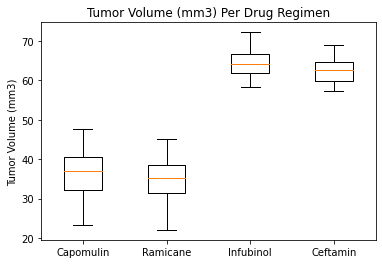

In [27]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels=['Capomulin','Ramicane','Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=labels)
ax1.set_title('Tumor Volume (mm3) Per Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

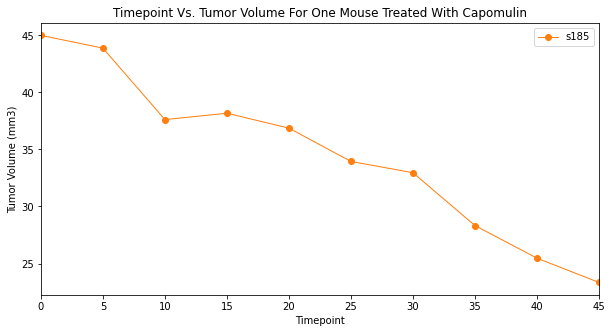

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
one_mouse_capomulin = (clean_study.loc[clean_study['Drug Regimen']=='Capomulin']).head(10)
plt.figure(figsize=(10,5))
plt.plot(one_mouse_capomulin['Timepoint'],one_mouse_capomulin['Tumor Volume (mm3)'], marker='o',
         color='tab:orange',linewidth=1)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(one_mouse_capomulin['Mouse ID'], loc='best')
plt.title('Timepoint Vs. Tumor Volume For One Mouse Treated With Capomulin')
plt.xlim(0,one_mouse_capomulin['Timepoint'].max())
plt.show()

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
